In [64]:
!pip install japanize-matplotlib

In [90]:
import numpy as np
import pandas as pd
import japanize_matplotlib 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import scipy.stats as stats

In [91]:
Data = pd.read_csv(r"C:\Users\sk062\OneDrive\デスクトップ\検索数.csv",encoding="UTF-8")

In [92]:
Data

,週,Air Max: (日本),Air Jordan: (日本),Air Force: (日本)
0,2020/1/19,79,39,74
1,2020/1/26,81,38,65
2,2020/2/2,71,46,67
3,2020/2/9,72,52,67
4,2020/2/16,75,47,61
...,...,...,...,...
257,2024/12/22,49,82,54
258,2024/12/29,60,59,72
259,2025/1/5,45,40,68
260,2025/1/12,43,40,74


In [93]:
Data.describe()

,Air Max: (日本),Air Jordan: (日本),Air Force: (日本)
count,262.000000,262.000000,262.000000
mean,48.519084,40.229008,68.889313
std,11.629235,7.204261,8.050556
min,31.000000,26.000000,47.000000
25%,41.000000,35.000000,64.000000
50%,45.500000,40.000000,68.000000
75%,54.000000,44.000000,74.000000
max,100.000000,82.000000,94.000000


In [94]:
# Data.describe()の出力を取得
summary = Data.describe()

# プロット設定
fig, ax = plt.subplots(figsize=(10, 6))  # 画像サイズを調整
ax.axis('off')  # 軸をオフにする
ax.axis('tight')  # テーブルをタイトに配置
table = ax.table(cellText=summary.values, colLabels=summary.columns, rowLabels=summary.index, loc='center')

# テーブルのスタイルを調整
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(summary.columns))))

# 画像の保存
output_path = r"C:\Users\sk062\OneDrive\デスクトップ\記述統計量の確認.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.close()

print(f"記述統計量の画像を保存しました: {output_path}")


記述統計量の画像を保存しました: C:\Users\sk062\OneDrive\デスクトップ\記述統計量の確認.png


In [95]:
Data.shape

(262, 4)

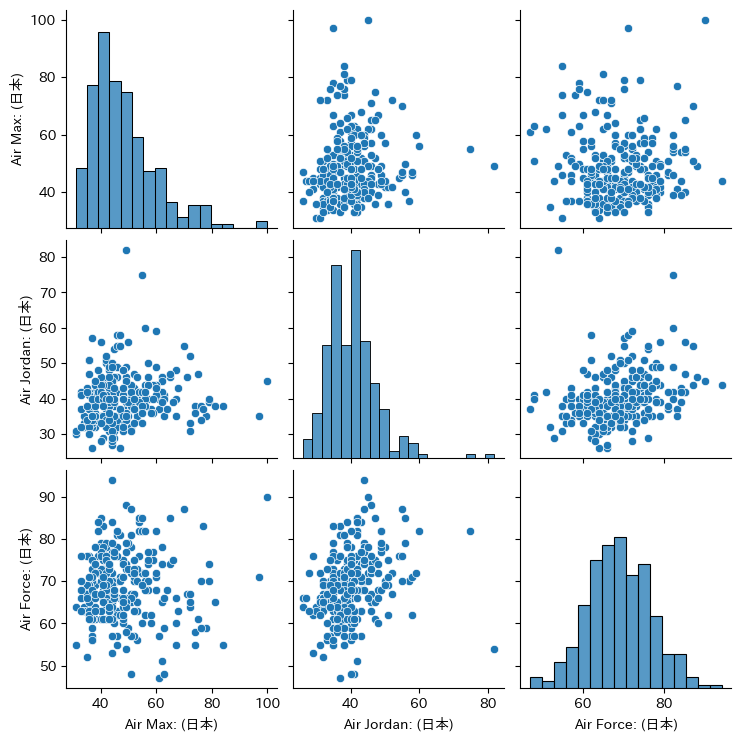

In [96]:
pair = sns.pairplot(Data)

In [97]:
%matplotlib inline

In [98]:
r"C:\Users\sk062\OneDrive\デスクトップ\記述統計量の確認.png"
pair.savefig(r"C:\Users\sk062\OneDrive\デスクトップ\pair.png")

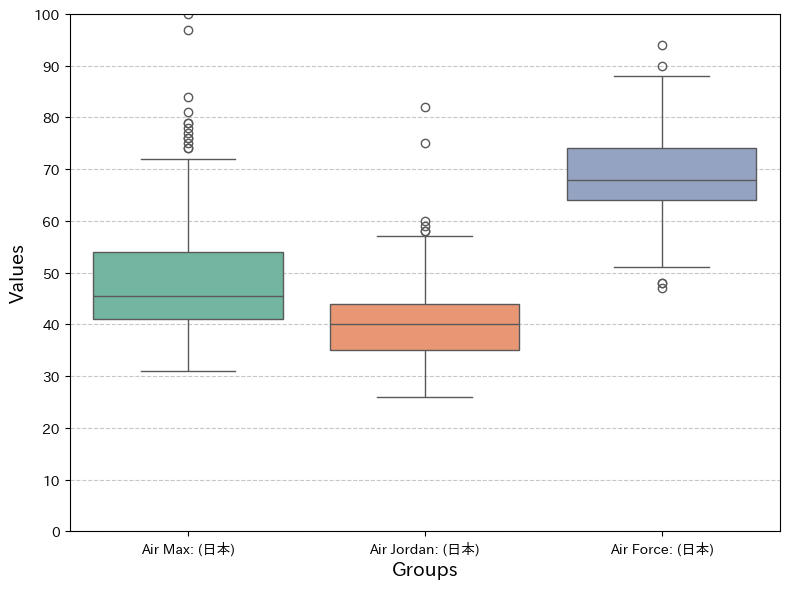

In [99]:
# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=Data, palette='Set2')

# Customize the plot
plt.xlabel('Groups', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set the y-axis range and ticks
plt.ylim(0, 100)
plt.yticks(range(0, 101, 10))  # Ticks from 0 to 100 with intervals of 10

# Show the plot
plt.tight_layout()
plt.show()


In [100]:
Data.columns

Index(['週', 'Air Max: (日本)', 'Air Jordan: (日本)', 'Air Force: (日本)'], dtype='object')

In [101]:
Data.rename(columns={
    '週': 'week',
    'Air Max: (日本)': 'Air Max',
    'Air Jordan: (日本)': 'Air Jordan',
    'Air Force: (日本)': 'Air Force'
}, inplace=True)

In [102]:
Data.head()

,week,Air Max,Air Jordan,Air Force
0,2020/1/19,79,39,74
1,2020/1/26,81,38,65
2,2020/2/2,71,46,67
3,2020/2/9,72,52,67
4,2020/2/16,75,47,61


In [103]:
# 各ブランドのデータをリスト形式に変換
Air_Max = Data['Air Max']
Air_Jordan = Data['Air Jordan']
Air_Force = Data['Air Force']

# 一元配置分散分析
f_stat, p_value = f_oneway(Air_Max, Air_Jordan, Air_Force)

# 結果を出力
print("F-statistic:", f_stat)
print("P-value:", p_value)

# 結果の解釈
if p_value < 0.05:
    print("有意な差があります（少なくとも1つのグループの平均が他と異なる可能性があります）。")
else:
    print("有意な差はありません（グループ間の平均は統計的に有意な差がないと考えられます）。")

F-statistic: 678.5663209719307
P-value: 1.096981490479836e-171
有意な差があります（少なくとも1つのグループの平均が他と異なる可能性があります）。


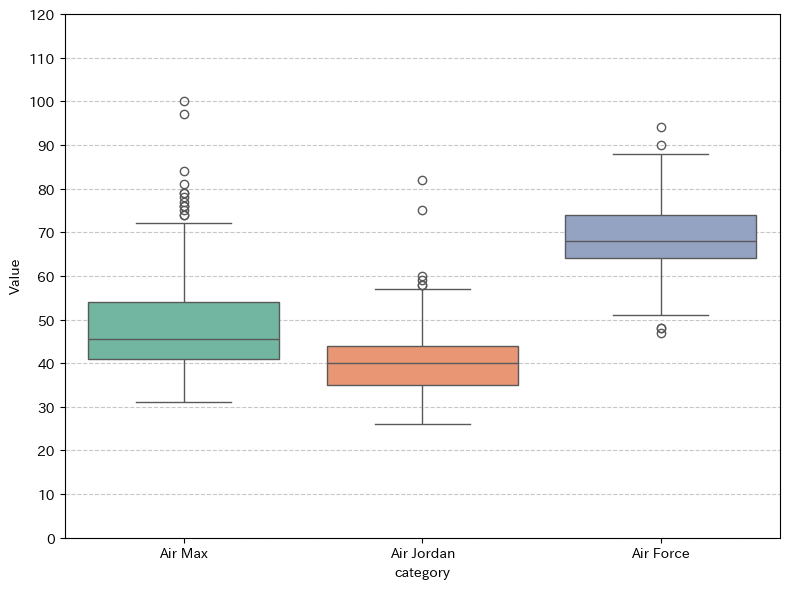

In [104]:
plt.figure(figsize=(8,6))
sns.boxplot(data = Data, palette="Set2")

plt.ylim(0, 120)
plt.yticks(range(0, 121, 10))

plt.xlabel("category")
plt.ylabel("Value")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
save_path = r"C:\Users\sk062\OneDrive\デスクトップ\ANVOA.jpg"
plt.savefig(save_path)
plt.show()

In [106]:
Air_Jordan = Data['Air Jordan']
Air_Force = Data['Air Force']

differences = Air_Jordan - Air_Force

t_stat,p_value = stats.ttest_rel(Air_Jordan, Air_Force)
print("t-statistic:", t_stat)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("帰無仮説を棄却する。有意な差がある")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

t-statistic: -51.58706889377633
p-value: 6.446137203405461e-139
帰無仮説を棄却する。有意な差がある
